                                MEC-E5012 - Vehicle Mechatronics: Control       

# Exercise 1 (25 p)

### Important! : Make sure that you only write your code in the parts that we have explicitly asked you to. Do not edit other cells or parts of the code which we have not asked you to change. Feel free to play around with these other parameters AFTER you have submitted your exercise.


## Python - Kinematic Turtlebot models

The goal of this exercise is to develop a kinematic model of the Turtlebot3 Burger, which has speed <code>v</code> and angular speed <code>w</code> as inputs and accordingly adjust the wheel speeds to move on a predefined path. However, first implementation of the model in this exercise (Task 1) will have wheel speeds as inputs, because it is more straightforward to code.

For those of you that have not used python classes before, the <code>KinematicTurtle</code>-class is used here to store the model parameters and variables in addition to defining functions that change the state $(x,y, \theta)$  of the vehicle


# Task 1: Wheel speeds as inputs (6 p)

Here you will implement a discrete time model of the Turtlebot, which takes wheel speeds (<code>w1</code> and <code>w2</code>) as inputs.

In the next cell, the relevant libraries are imported and the <code>KinematicTurtle</code>-class is initialized. The wheelbase, wheel radius, max speed and max angular speed are all determined by the spesifications of the actual Turtlebot.

In [1]:
# Libraries required for the exercise
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
### Preliminary grader to give you a reference on how good is your solution ###
from graders import task1_grader
from graders import task1_grader_speeds
###############################################################################
solution = np.loadtxt('solutions/solution_task1.txt', delimiter=',', unpack = True)
solution_speeds = np.loadtxt('solutions/solution_task1_speeds.txt', delimiter=',', unpack = True)
plt.rcParams['figure.figsize'] = [12, 8] 

class KinematicTurtle():
    def __init__(self):
        self.w1 = 0 # Wheel 1 speed
        self.w2 = 0 # Wheel 2 speed
        self.x = 0 # X coordinate
        self.y = 0 # Y coordinate
        self.theta = 0 # Heading
        self.w = 0 # Vehicle angular speed
        self.v = 0 # Speed
        
        self.l = 0.16 # Wheelbase
        self.r = 0.033 # Wheel radius
        self.wi_max = 6 # Maximum wheel speed (rad/s))
        
        self.sample_time = 0.01
        
    def reset(self):
        self.w1 = 0 # Wheel 1 speed
        self.w2 = 0 # Wheel 2 speed
        self.x = 0 # X coordinate
        self.y = 0 # Y coordinate
        self.theta = 0 # Heading
        self.w = 0 # Angular speed
        self.v = 0 # Speed

Next, you will continue to further define <code>KinematicTurtle</code>-class by implementing a function <code>wi_step</code> (i-th wheel discrete time control). This applies a discrete time step of <code>self.sample_time</code>. The main purpose of this function is to update the model's heading (<code>self.theta</code>) along with x and y coordinates (<code>self.x</code> and <code>self.y</code>). Utilize the following equations from the lecture.

[//]: \begin{align*}
[//]: \dot{x} &= \frac{r(w_{1}+w_{2})}{2}\cos{\theta} \\
[//]: \dot{y} &= \frac{r(w_{1}+w_{2})}{2}\sin{\theta} \\
[//]: \dot{\theta} &= \frac{r(w_{1}-w_{2})}{l} \\
[//]: \end{align*}

\begin{align*}
x_{k+1} &= x_k + \left[\frac{r(w_{1,k}+w_{2,k})}{2}\cos{\theta_k}\right]\Delta t \\
y_{k+1} &= y_k + \left[\frac{r(w_{1,k}+w_{2,k})}{2}\sin{\theta_k}\right]\Delta t \\
\theta_{k+1} &= \theta_k + \left[\frac{r(w_{1,k}-w_{2,k})}{l}\right]\Delta t \\
\end{align*}

The function <code>wi_step</code> comprises of the following steps:
1. Wheel speeds are limited to have maximum of <code>self.wi_max</code>
2. Calculate and update the speed and angular speed (<code>self.v</code> and <code>self.w</code>)
3. Update the values of <code>self.theta</code>, <code>self.x</code> and <code>self.y</code>


In [3]:
class KinematicTurtle(KinematicTurtle):
    def wi_step(self, w1, w2):
        
        ### YOUR CODE HERE  ~ 7 lines ###
        # self.w1 = ?
        # self.w2 = ?
        # self.v = ?
        # self.w = ?
        # self.x = ?
        # self.y = ?
        # self.theta = ?
        ###
        self.w1 = np.amin([w1, self.wi_max])
        self.w2 = np.amin([w2, self.wi_max])
        self.v = self.r*(self.w1 + self.w2)/2 
        self.w = ((self.w1 - self.w2) * self.r) / self.l
        self.x = self.x + ((self.v * np.cos(self.theta)) * self.sample_time)
        self.y = self.y + ((self.v * np.sin(self.theta)) * self.sample_time)
        self.theta = self.theta + (self.w * self.sample_time)
        pass

Now that the model can move, its time to test it out.

In the code below, a <code>KinematicTurtle</code>-class instance is created. Then a time vector is initialized along with empty data vectors. The data vector is used to update the model in discrete time (step by step) and the data vectors are used to save the model states at said time steps. These are needed because the <code>model</code> only saves the current status.

Such wheel speed data vectors are fed to the kinematic model, that the turtlebot should travel in a similar track as drawn in blue. Let's see if the created model is capable of following the track!

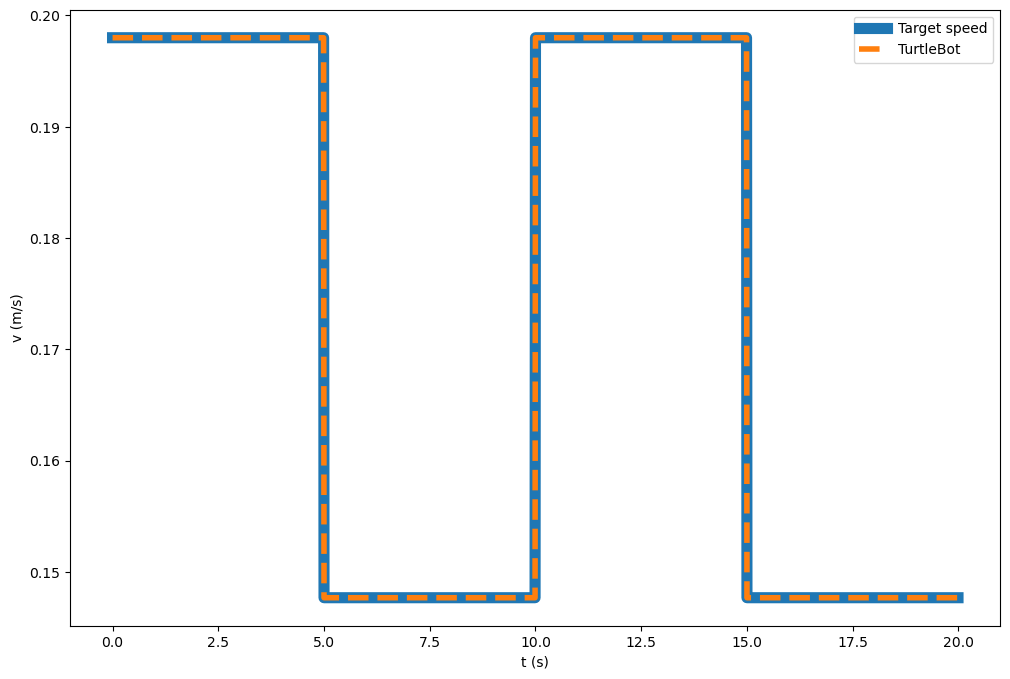

< --- Grading based on speed calculations --- >
Your Turtlebot is within 0.00 m/s mean absolute error with respect to the linear speed

✅ Looking good, no errors!


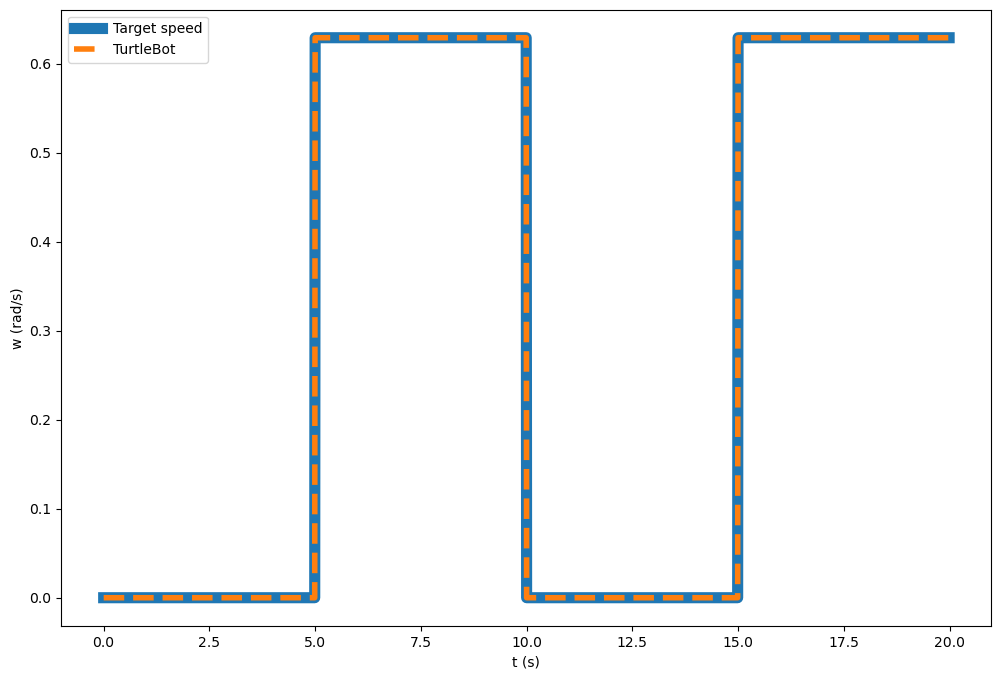

< --- Grading based on speed calculations accuracy --- >
Your Turtlebot is within 0.00 rad/s mean absolute error with respect to the angular speed

✅ Looking good, no errors!


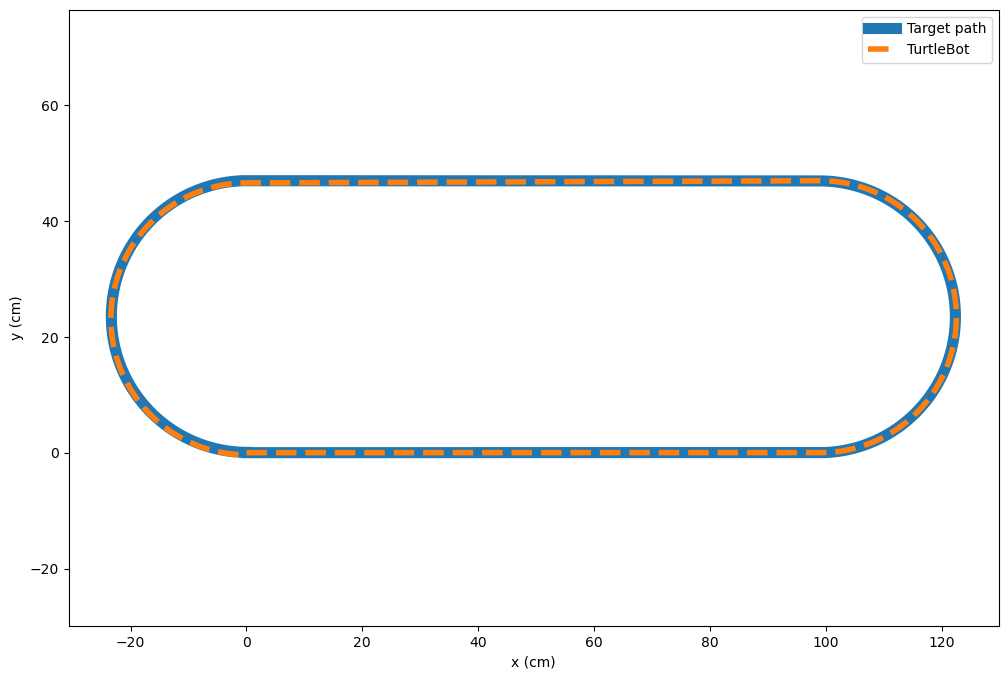

< --- Grading based on path accuracy --- >
Your Turtlebot followed the target path within 0.20 cm mean absolute error

✅ Looking good, the error is quite low!


In [4]:
model = KinematicTurtle() # Create an instance of the KinematicTurtle() -class we have defined
time = 20 # Simulation time

# Initialize a time vector and empty (full of zeros) data vectors
t_data = np.arange(0,time,model.sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
x_solution = x_data
y_solution = y_data

w1_data = np.zeros_like(t_data)
w2_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)
w_data = np.zeros_like(t_data)


# Wheel speed data inputs
###
w1_data[0:500] = 6
w2_data[0:500] = 6
w1_data[500:1000] = 6
w2_data[500:1000] = 2.95

w1_data[1000:1500] = 10
w2_data[1000:1500] = 10

w1_data[1500:2000] = 7
w2_data[1500:2000] = 2.95
###

for i in range(t_data.shape[0]):
    # Saving x and y coordinates every timestep
    x_data[i] = model.x
    y_data[i] = model.y
    
    model.wi_step(w1_data[i], w2_data[i])
    
    # Saving the linear speed and angular speed for next task
    v_data[i] = model.v
    w_data[i] = model.w
    
# Plotting (linear speed)
plt.figure()
plt.plot(solution_speeds[0], solution_speeds[1],label='Target speed', linewidth = 8)
plt.plot(t_data, v_data,label='TurtleBot', linewidth = 4, linestyle = 'dashed')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.legend()
plt.show()

# Grading [THIS IS NOT AUTOMATIC GRADER, JUST TO ASSIST IN GRADING]
mae, passed = task1_grader_speeds(v_data, solution_speeds[1], t_data.shape[0])
print('< --- Grading based on speed calculations --- >')
print('Your Turtlebot is within %.2f m/s mean absolute error with respect to the linear speed' % (mae))
print()
if passed and not np.isnan(mae) and mae >= 0:
    print('✅ Looking good, no errors!')
else:
    print('⚠️ Recheck your speed calculations to reduce the error.')
    
# Plotting (angular speed)
plt.figure()
plt.plot(solution_speeds[0], solution_speeds[2],label='Target speed', linewidth = 8)
plt.plot(t_data, w_data,label='TurtleBot', linewidth = 4, linestyle = 'dashed')
plt.xlabel('t (s)')
plt.ylabel('w (rad/s)')
plt.legend()
plt.show()

# Grading [THIS IS NOT AUTOMATIC GRADER, JUST TO ASSIST IN GRADING]
mae, passed = task1_grader_speeds(w_data, solution_speeds[2], t_data.shape[0])
print('< --- Grading based on speed calculations accuracy --- >')
print('Your Turtlebot is within %.2f rad/s mean absolute error with respect to the angular speed' % (mae))
print()
if passed and not np.isnan(mae) and mae >= 0:
    print('✅ Looking good, no errors!')
else:
    print('⚠️ Recheck your speed calculations to reduce the error.')

# Plotting (target path)
plt.figure()
plt.plot(solution[0]*100, solution[1]*100,label='Target path', linewidth = 8)
plt.axis('equal')
plt.plot(x_data*100, y_data*100,label='TurtleBot', linewidth = 4, linestyle = 'dashed')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.legend()
plt.show()

# Grading [THIS IS NOT AUTOMATIC GRADER, JUST TO ASSIST IN GRADING]
mae, passed = task1_grader(x_data, y_data, solution[0], solution[1], t_data.shape[0])
print('< --- Grading based on path accuracy --- >')
print('Your Turtlebot followed the target path within %.2f cm mean absolute error' % (mae*100))
print()
if passed and not np.isnan(mae) and mae >= 0:
    print('✅ Looking good, the error is quite low!')
else:
    print('⚠️ Over 5 cm mean absolute error. Improve your model and path to reduce the error.') 

# trajectory sanity check
data = np.load('solutions/ref_task1_traj.npz')
x_ref, y_ref = data['x_ref'], data['y_ref']
model_test = KinematicTurtle()
x_test = np.zeros_like(t_data)
y_test = np.zeros_like(t_data)
for i in range(len(t_data)):
    x_test[i], y_test[i] = model_test.x, model_test.y
    model_test.wi_step(w1_data[i], w2_data[i])

err_xy = np.max(np.hypot(x_ref - x_test, y_ref - y_test))
if err_xy > 1e-6:
    print(
        f"⚠️ Sanity check: Found a {err_xy:.2e} m deviation of your trajectory from the reference.\n" 
        "   Hint: if the above plots are correct, then check the order by which you update the coordinates and heading."
    ) 

In [5]:
# --- DO NOT RUN IF ALREADY DONE: trajectory sanity check ---
# create two new instances:
model_ref  = KinematicTurtle()
model_test = KinematicTurtle()

# storage
x_ref  = np.zeros_like(t_data)
y_ref  = np.zeros_like(t_data)
x_test = np.zeros_like(t_data)
y_test = np.zeros_like(t_data)

for i in range(len(t_data)):
    # reference trajectory (manual forward‐Euler in the right order):
    x_ref[i] = model_ref.x
    y_ref[i] = model_ref.y

    # compute wheel speeds → v, w exactly as in wi_step:
    w1 = np.amin([w1_data[i], model_ref.wi_max])
    w2 = np.amin([w2_data[i], model_ref.wi_max])
    v  = model_ref.r * (w1 + w2) / 2
    w  = (w1 - w2) * model_ref.r / model_ref.l

    # update x,y using θ_k:
    model_ref.x     += v * np.cos(model_ref.theta) * model_ref.sample_time
    model_ref.y     += v * np.sin(model_ref.theta) * model_ref.sample_time
    # *then* update θ:
    model_ref.theta += w * model_ref.sample_time

    # student trajectory:
    x_test[i] = model_test.x
    y_test[i] = model_test.y
    model_test.wi_step(w1_data[i], w2_data[i])

##### np.savez('solutions/ref_task1_traj.npz', x_ref=x_ref, y_ref=y_ref)

# compare:
err_xy = np.max( np.hypot(x_ref - x_test, y_ref - y_test) )
print(f'err_xy: {err_xy}')
# --- DO NOT RUN IF ALREADY DONE: trajectory sanity check ---

err_xy: 0.0


# Task 2: Speed and angular speed as inputs (6 p)

A discrete time model of the Turtlebot is implemented, which takes speed <code>v</code> and angular speed <code>w</code> as inputs. Implement the function <code>vw_step</code>.

The tasks that the function needs to do are:

1. Update vehicle position <code>(x,y)</code>
2. Update the values of <code>self.theta</code>, <code>self.w1</code> and <code>self.w2</code>

In [5]:
solution_task2 = np.loadtxt('solutions/solution_task2_speeds.txt', delimiter=',', unpack = True)
class KinematicTurtle(KinematicTurtle):
    def vw_step(self, v, w):
        ### YOUR CODE HERE  ~ 5 lines ###
        self.x += v * np.cos(self.theta) * self.sample_time
        self.y += v * np.sin(self.theta) * self.sample_time
        self.theta += w * self.sample_time
        self.w1 = v / self.r + (self.l * w) / (2 * self.r)
        self.w2 = ((2 * v) / (self.r)) - self.w1
    
        pass

Now that the model can move, its time to test it out. This time around you do not need program the path of the vehicle because the linear speed and angular speed (<code>v_data</code> and <code>w_data</code>) of the previous task were saved.

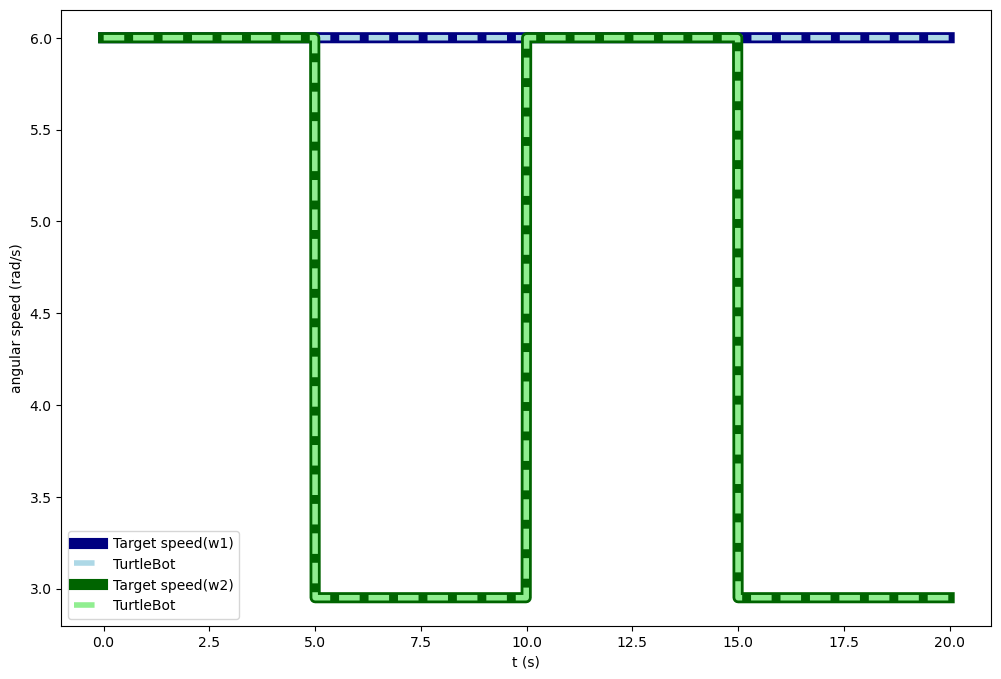

< --- Grading based on speed calculations --- >
Your Turtlebot is within 0.00 rad/s and 0.00 rad/s mean absolute errors with respect to the angular wheel speeds (w1 and w2 respectively)

✅ Looking good, no errors!


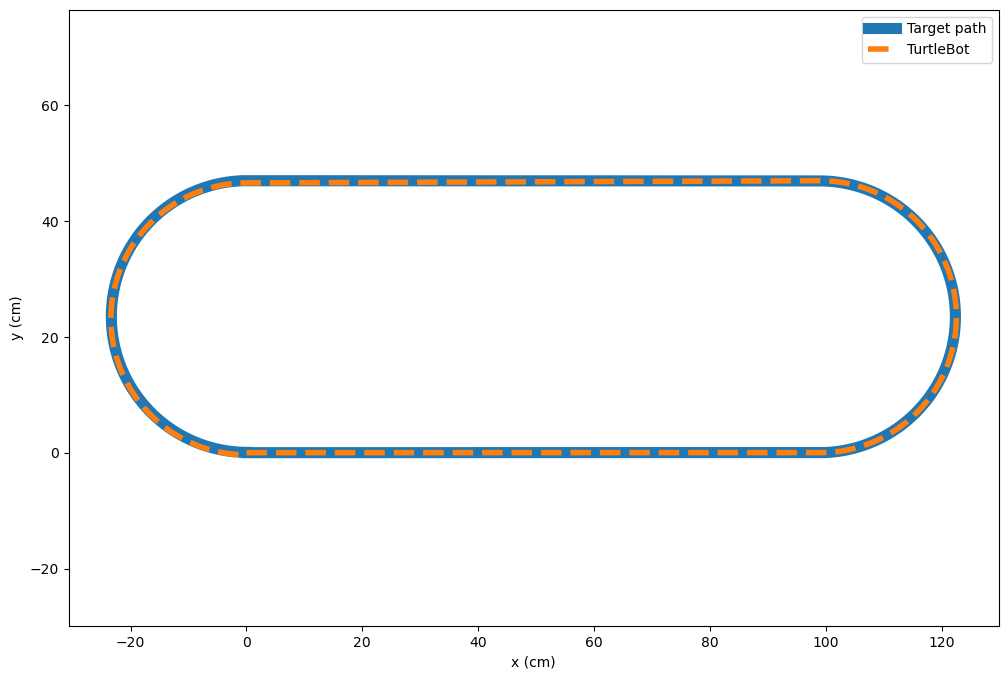

< --- Grading based on path accuracy --- >
Your Turtlebot followed the target path within 0.20 cm mean absolute error

✅ Looking good, the error is quite low!


In [7]:
model = KinematicTurtle()
model.reset()

# Reset x and y coordinate data
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
w1_data = np.zeros_like(t_data)
w2_data = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    x_data[i] = model.x
    y_data[i] = model.y
    model.vw_step(v_data[i], w_data[i])
    w1_data[i] = model.w1
    w2_data[i] = model.w2

# Plotting (w1 and w2)
plt.figure()
plt.plot(solution_task2[0], solution_task2[1],label='Target speed(w1)', linewidth = 8, color='navy')
plt.plot(t_data, w1_data,label='TurtleBot', linewidth = 4, linestyle = 'dashed', color='lightblue')

plt.plot(solution_task2[0], solution_task2[2],label='Target speed(w2)', linewidth = 8, color='darkgreen')
plt.plot(t_data, w2_data,label='TurtleBot', linewidth = 4, linestyle = 'dashed', color='lightgreen')

plt.xlabel('t (s)')
plt.ylabel('angular speed (rad/s)')
plt.legend()
plt.show()

# Grading [THIS IS NOT AUTOMATIC GRADER, JUST TO ASSIST IN GRADING]
mae1, passed1 = task1_grader_speeds(w1_data, solution_task2[1], t_data.shape[0])
mae2, passed2 = task1_grader_speeds(w2_data, solution_task2[2], t_data.shape[0])

print('< --- Grading based on speed calculations --- >')
print('Your Turtlebot is within %.2f rad/s and %.2f rad/s mean absolute errors with respect to the angular wheel speeds (w1 and w2 respectively)' % (mae1, mae2))
print()
if passed1 and passed2 and not np.isnan(mae1) and mae1 >= 0 and not np.isnan(mae2) and mae2 >= 0:
    print('✅ Looking good, no errors!')
else:
    print('⚠️ Recheck your speed calculations to reduce the error.')
    
# Plotting (x and y)
plt.figure()
plt.plot(solution[0]*100, solution[1]*100,label='Target path', linewidth = 8)
plt.axis('equal')
plt.plot(x_data*100, y_data*100,label='TurtleBot', linewidth = 4, linestyle = 'dashed')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.legend()
plt.show()

# Grading [THIS IS NOT AUTOMATIC GRADER, JUST TO ASSIST IN GRADING]
mae, passed = task1_grader(x_data, y_data, solution[0], solution[1], t_data.shape[0])
print('< --- Grading based on path accuracy --- >')
print('Your Turtlebot followed the target path within %.2f cm mean absolute error' % (mae*100))
print()
if passed and not np.isnan(mae) and mae >= 0:
    print('✅ Looking good, the error is quite low!')
else:
    print('⚠️ Over 5 cm mean absolute error, improve your model and path to reduce the error.')

data       = np.load('solutions/ref_task2_traj.npz')
x_ref, y_ref = data['x_ref'], data['y_ref']

model_test = KinematicTurtle()
x_test2  = np.zeros_like(t_data)
y_test2   = np.zeros_like(t_data)

for i in range(len(t_data)):
    x_test2[i], y_test2[i] = model_test.x, model_test.y
    model_test.vw_step(v_data[i], w_data[i])

err2 = np.max(np.hypot(x_ref - x_test2, y_ref - y_test2))

if err2 > 1e-6:
    print(
        f"⚠️ Sanity check: Found a {err_xy:.2e} m deviation of your trajectory from the reference.\n" 
        "   Hint: if the above plots are correct, then check the order by which you update the coordinates and heading."
    )     

In [16]:
# --- DO NOT RUN IF ALREADY DONE: trajectory sanity check ---
model_ref = KinematicTurtle()
x_ref = np.zeros_like(t_data)
y_ref = np.zeros_like(t_data)

for i in range(len(t_data)):
    # stamp current pose
    x_ref[i] = model_ref.x
    y_ref[i] = model_ref.y
    # step x,y using θ_k
    model_ref.x     += v_data[i] * np.cos(model_ref.theta) * model_ref.sample_time
    model_ref.y     += v_data[i] * np.sin(model_ref.theta) * model_ref.sample_time
    # then step θ
    model_ref.theta += w_data[i] * model_ref.sample_time

# now that x_ref & y_ref are populated, save them:
#### np.savez('solutions/ref_task2_traj.npz', x_ref=x_ref, y_ref=y_ref)
# --- DO NOT RUN IF ALREADY DONE: trajectory sanity check ---

# Python - Dynamic Turtlebot model
Next, we'll move into dynamic modeling. You'll create a dynamic model of the turtlebot, and then implement a PID-controller for longitudinal control.


# Task 3: Dynamic Turtlebot model (6p)
In this task, you will create a turtlebot model that is based on system dynamics.
You can use the following equations as a reference while building your model.

\begin{align*}
\Sigma{F} &= F_x - F_d - F_r - mg\sin{\alpha} \\
\dot{v} &= \frac{\Sigma{F}}{m} \\
v_{k+1} &= v_k + \frac{\Sigma{F}}{m}\Delta t \\
v_{k+1} &= v_k + \frac{F_x - F_d - F_r - mg\sin{\alpha}}{m}\Delta t \\
\end{align*}

The model is a discrete time model and the controlled system variable in the longitudinal direction is the gas (and brake) pedal , which is denoted as <code>gas</code>. The gas pedal has a range of [-1,1] , which translates to [-2,2] Newtons of tractive force, $F_x$. The resistive forces are denoted as $F_d$ for the aerodynamic drag force and $F_r$ for the rolling resistance. The TurtleBot in reality can only go 0.22 m/s but for the sake of this exercise we will pretend that the max speed is 10 m/s for the drag force to have an effect. Note that the TurtleBot is operating on flat terrain the entire time.

First the required libraries are imported and the <code>DynamicTurtle</code>-class is initialized.

In [8]:
### Preliminary grader to give you a reference on how good is your solution ###
def grader(t,v,v_ref,n):
    mae = (1/n)*np.sum(np.abs(v-v_ref))
    passed = True
    if t == 3 and mae > 2:
        passed = False
    if t == 4 and mae > 0.1:
        passed = False
    return mae, passed
###############################################################################

class DynamicTurtle():
    def __init__(self):
        self.v = 0
        self.v_ref = 0
        
        self.g = 9.81 #Gravitational acceleration
        self.m = 1 # Weight (kg)
        self.rrc = 0.015 # Rolling resistance coefficient
        self.Cd = 0.5 # Coefficient of Drag
        self.A = 0.034 # Frontal Area
        self.roo = 1.22 # Density of Air

        self.Fr = 0
        self.Fd = 0
        self.Fx = 0
        self.Fx_max = 2

        # Controller parameters
        self.error = 0
        self.cumulative_error = 0
        self.change_in_error = 0
        self.previous_error = 0
        self.Kp = 0
        self.Ki = 0
        self.Kd = 0
        
        self.sample_time = 0.01
        
    def reset(self):
        self.v = 0
        self.v_ref = 0
        
        self.Fr = 0
        self.Fd = 0
        self.Fx = 0

Next, you will be continuing the defintion of the <code>DynamicTurtle</code>-class. Code a one step that the model takes. The logic behind the code should be
1. <code>gas</code> sets the tractive force
2. Calculate the resistive forces
3. **Update the velocity value of the model**

In [9]:
class DynamicTurtle(DynamicTurtle):
    def step(self, gas):
        gas_lim = np.max((-1,np.min((gas, 1))))
        self.Fx = gas_lim*self.Fx_max
        ### YOUR CODE HERE ~3 LINES ###
        #self.Fd = ?
        #self.Fr = ?
        #self.v = ?
        ###
        self.Fd = (self.Cd * self.roo * np.square(self.v) * self.A)/2 
        self.Fr = self.rrc * (self.m * self.g)
        self.v = self.v + (((self.Fx - self.Fd - self.Fr)/self.m) * self.sample_time)
        pass

Now that you have a model to compute a discrete time step, it is time to test it. The code below is used to drive the Turtlebot for 20 seconds. The gas is set to 50 % for the entire time. The reference speed is the target, yet we notice that **open loop control is not very accurate or reliable, since it falls short** and with no feedback the system does not know that it is failing to meet the reference speed.

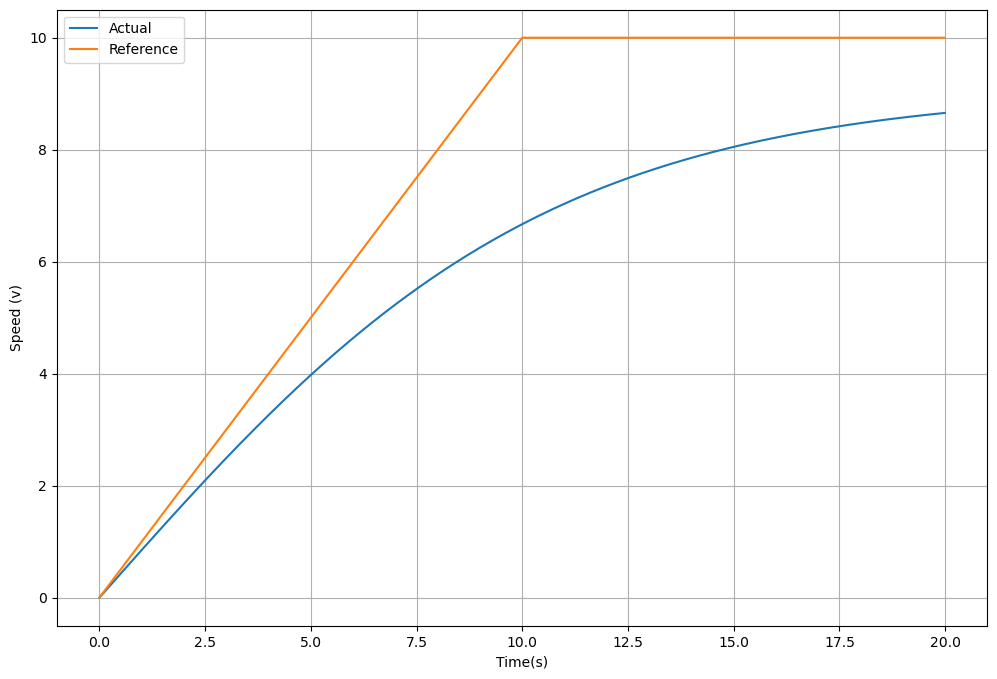

< --- Grading based on velocity accuracy --- >
Your Turtlebot followed the target path within 1.66 m/s mean absolute error

✅ Looking good, the error is quite low!


In [11]:
model = DynamicTurtle()
time = 20

#Initialize data
t_data = np.arange(0,time,model.sample_time)
x_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)

# Target
v_ref = np.zeros_like(t_data)
v_ref[0:1000] = np.arange(0,10,model.sample_time)
v_ref[1000:2000] = 10

gas = 0.5 # 50 %

for i in range(t_data.shape[0]):
    v_data[i] = model.v
    model.step(gas)

plt.plot(t_data, v_data, label='Actual')
plt.plot(t_data, v_ref, label='Reference')
plt.ylabel('Speed (v)')
plt.xlabel('Time(s)')
plt.grid()
plt.legend()
plt.show()

# Grading [THIS IS NOT AUTOMATIC GRADER, JUST TO ASSIST IN GRADING]
mae, passed = grader(3, v_data, v_ref, t_data.shape[0])
print('< --- Grading based on velocity accuracy --- >')
print('Your Turtlebot followed the target path within %.2f m/s mean absolute error' % (mae))
print()
if passed and not np.isnan(mae) and mae >= 0:
    print('✅ Looking good, the error is quite low!')
else:
    print('⚠️ Over 2 m/s mean absolute error. Improve your model to reduce the error.')

data    = np.load('solutions/ref_task3_vel.npz')
v_gold  = data['v_gold']   # the true forward‐Euler result
model   = DynamicTurtle()
v_test  = np.zeros_like(t_data)

for i in range(len(t_data)):
    v_test[i] = model.v
    model.step(gas)

err = np.max(np.abs(v_test - v_gold))
if err > 1e-6:
    print(f"⚠️ Sanity check: your velocity differs by {err:.2e} m/s. Recheck the equations.")

In [8]:
# --- DO NOT RUN IF ALREADY DONE: trajectory sanity check ---
model_ref = DynamicTurtle()
time = 20
t_data = np.arange(0, time, model_ref.sample_time)

# storage for the gold‐standard velocity
v_gold = np.zeros_like(t_data)

# fixed 50% gas command
gas = 0.5

for i in range(len(t_data)):
    v_gold[i] = model_ref.v
    model_ref.step(gas)

# save it for students to load in their sanity check
np.savez('solutions/ref_task3_vel.npz', v_gold=v_gold)
# --- DO NOT RUN IF ALREADY DONE: trajectory sanity check ---

# Task 4: Longitudinal PID controller (7p)

Now that we have a model and open loop control, let's add PID controller and upgrade our the Dynamic model of Exercise 1 from open loop to closed loop feedback system. In order to keep the tuning process interesting, the Turtlebot is again allowed to travel 10 m/s for the drag to take effect. The following steps need to be taken:
1. Calculate the error
2. Calculate cumulative and change in the error
3. Set current error to <code>self.previous_error</code> for next loop
4. Set P, I, D values

In [23]:
class DynamicTurtle(DynamicTurtle):
    def PID(self, v_ref):
        
        ### YOUR CODE HERE ~7 LINES ###

        ##Note: check the given variables for PID errors in the initialization of DynamicTurtle -class.
        #P = ?
        #I = ?
        #D = ?
        ###
        ###
        self.error = v_ref - self.v
        P = self.Kp * self.error
        self.change_in_error = self.error - self.previous_error
        D = self.Kd * (self.change_in_error/self.sample_time) 
        self.cumulative_error = self.cumulative_error + self.error
        I = self.Ki * (self.cumulative_error*self.sample_time)
        self.previous_error = self.error
        ###        
        return P,I,D
    
    # Helper functions to tune the controller gains in the next cell
    
    def setKp(self, Kp):
        self.Kp = Kp
        
    def setKi(self, Ki):
        self.Ki = Ki
        
    def setKd(self, Kd):
        self.Kd = Kd


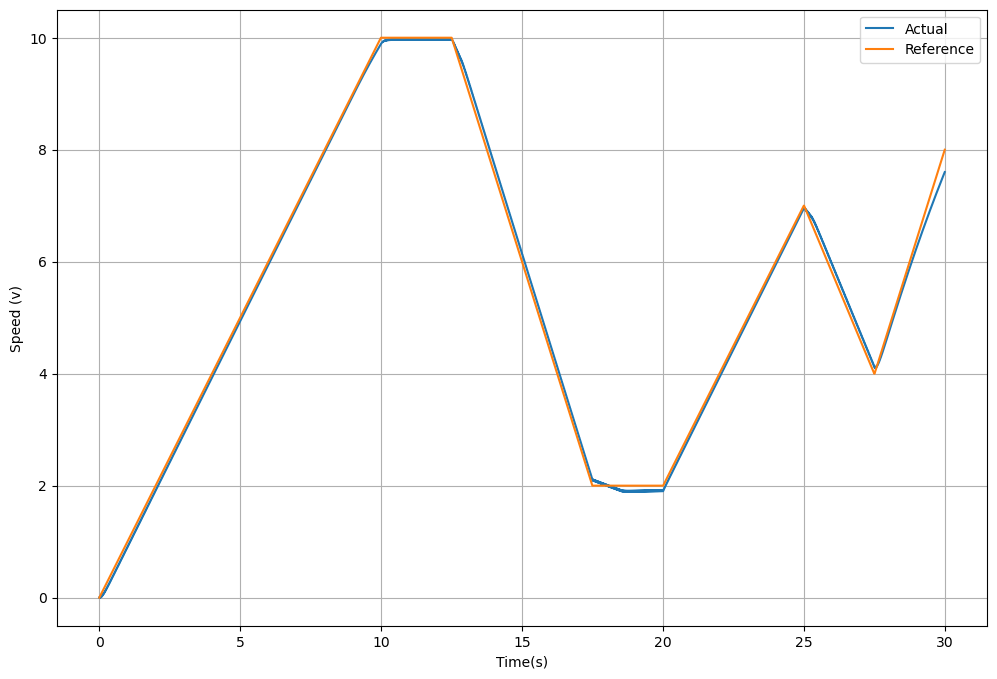

< --- Grading based on velocity accuracy --- >
Your Turtlebot followed the target path within 0.09 m/s mean absolute error

✅ Looking good, the error is quite low!


In [24]:
model = DynamicTurtle()
model.reset()
time = 30

#Initialize data
t_data = np.arange(0,time,model.sample_time)
x_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)

# Target
v_ref = np.zeros_like(t_data)
v_ref[0:1000] = np.linspace(0,10,1000)
v_ref[1000:1250] = 10
v_ref[1250:1750] = np.linspace(10,2,500)
v_ref[1750:2000] = 2
v_ref[2000:2500] = np.linspace(2,7,500)
v_ref[2500:2750] = np.linspace(7,4,250)
v_ref[2750:3000] = np.linspace(4,8,250)
gas = 0 # Initally no gas

# Set PID controller gains (use model.setK_() command where _ is p,i or d)
### YOUR CODE ~3 LINES ###
model.setKp(10)
model.setKi(1)
model.setKd(1)
###

for i in range(t_data.shape[0]):
    v_data[i] = model.v
    P,I,D = model.PID(v_ref[i])
    gas = P + I + D
    model.step(gas)

plt.plot(t_data, v_data, label='Actual')
plt.plot(t_data, v_ref, label='Reference')
plt.ylabel('Speed (v)')
plt.xlabel('Time(s)')
plt.grid()
plt.legend()
plt.show()


# Grading [THIS IS NOT AUTOMATIC GRADER, JUST TO ASSIST IN GRADING]
mae, passed = grader(4, v_data, v_ref, t_data.shape[0])
print('< --- Grading based on velocity accuracy --- >')
print('Your Turtlebot followed the target path within %.2f m/s mean absolute error' % (mae))
print()
if passed and not np.isnan(mae) and mae >= 0:
    print('✅ Looking good, the error is quite low!')
else:
    print('⚠️ Over 0.1 m/s mean absolute error. Improve your model to reduce the error.')

# Equations check
test = DynamicTurtle()
test.reset()
test.previous_error   = 0.0
test.cumulative_error = 0.0
test.v                = 0.0
test.setKp(1000)
test.setKi(2000)
test.setKd(3000)
dummy_p, dummy_i, dummy_d = test.PID(6.0)
if dummy_p!=6000.0:
    print('⚠️ Recheck equation for the P (Proportional) term')
if dummy_i!=120.0:
    print('⚠️ Recheck equation for I (Integral) term')
if dummy_d!=1800000.0:
    print('⚠️ Recheck equation for D (Derivative) term')

Congratulations for completing the exercise! :)

<b>Submit only this Jupyter Notebook file to MyCourses.</b>